In [ ]:
%load_ext autoreload
%autoreload 2

import qiskit
import helpers.common as common
import helpers.gates as gates
import helpers.constants as constants

from typing import Literal

## Will X or Z Gates Flip a Bit in Shor Code

Result: 1


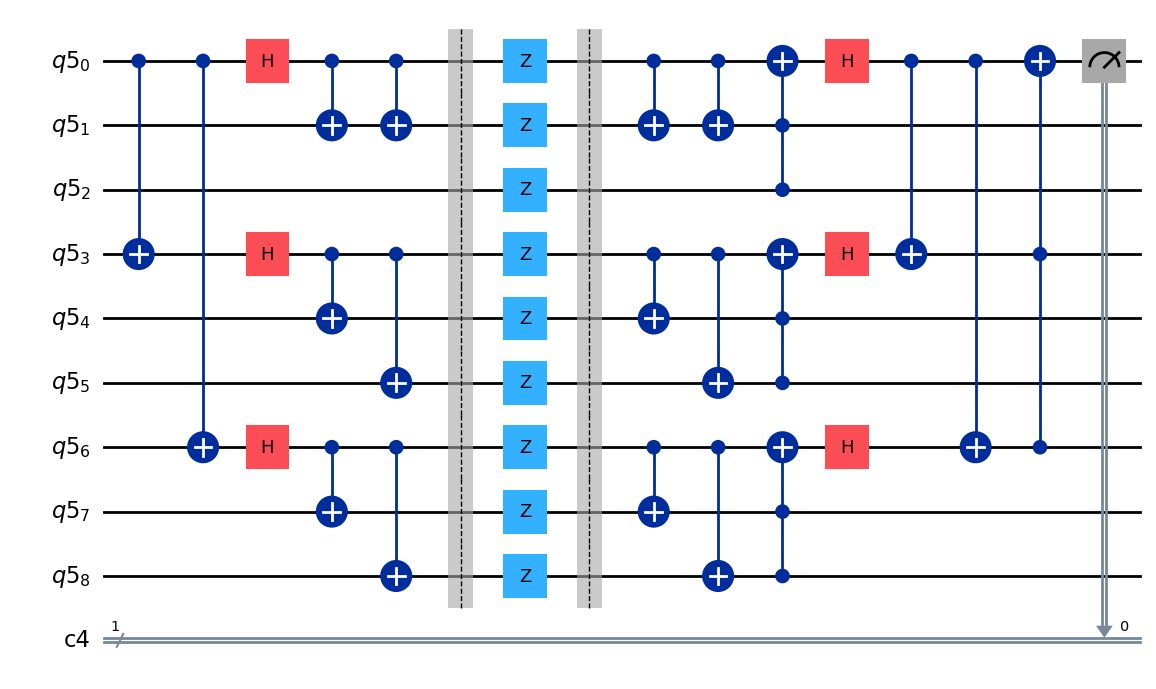

In [ ]:
qreq = qiskit.QuantumRegister(9)
classical = qiskit.ClassicalRegister(1)

circuit = qiskit.QuantumCircuit(qreq, classical)


# Shor setup
circuit.cx(qreq[0], qreq[3])
circuit.cx(qreq[0], qreq[6])
circuit.h(qreq[0])
circuit.h(qreq[3])
circuit.h(qreq[6])
circuit.cx(qreq[0], qreq[1])
circuit.cx(qreq[0], qreq[1])
circuit.cx(qreq[3], qreq[4])
circuit.cx(qreq[3], qreq[5])
circuit.cx(qreq[6], qreq[7])
circuit.cx(qreq[6], qreq[8])

circuit.barrier()

# Flipping a bit
# Inside of the Shor setup to flip a bit you can't use X gates, you need to use Z gates
gate_type: Literal["X", "Z"] = "Z"

for i in range(9):
    if gate_type == "X":
        circuit.x(qreq[i])
    elif gate_type == "Z":
        circuit.z(qreq[i])

circuit.barrier()

circuit.cx(qreq[0], qreq[1])
circuit.cx(qreq[0], qreq[1])
circuit.ccx(qreq[2], qreq[1], qreq[0])
circuit.cx(qreq[3], qreq[4])
circuit.cx(qreq[3], qreq[5])
circuit.ccx(qreq[5], qreq[4], qreq[3])
circuit.cx(qreq[6], qreq[7])
circuit.cx(qreq[6], qreq[8])
circuit.ccx(qreq[8], qreq[7], qreq[6])
circuit.h(qreq[0])
circuit.h(qreq[3])
circuit.h(qreq[6])
circuit.cx(qreq[0], qreq[3])
circuit.cx(qreq[0], qreq[6])
circuit.ccx(qreq[6], qreq[3], qreq[0])

circuit.measure(qreq[0], classical[0])

# Run the circuit

simulator = common.SimulatedQuantumComputer(circuit, 512)
counts = simulator.run()

print(f"Result: {simulator.most_common()}")
circuit.draw("mpl")

## What does a CNOT look like Shor Code

Result: 11


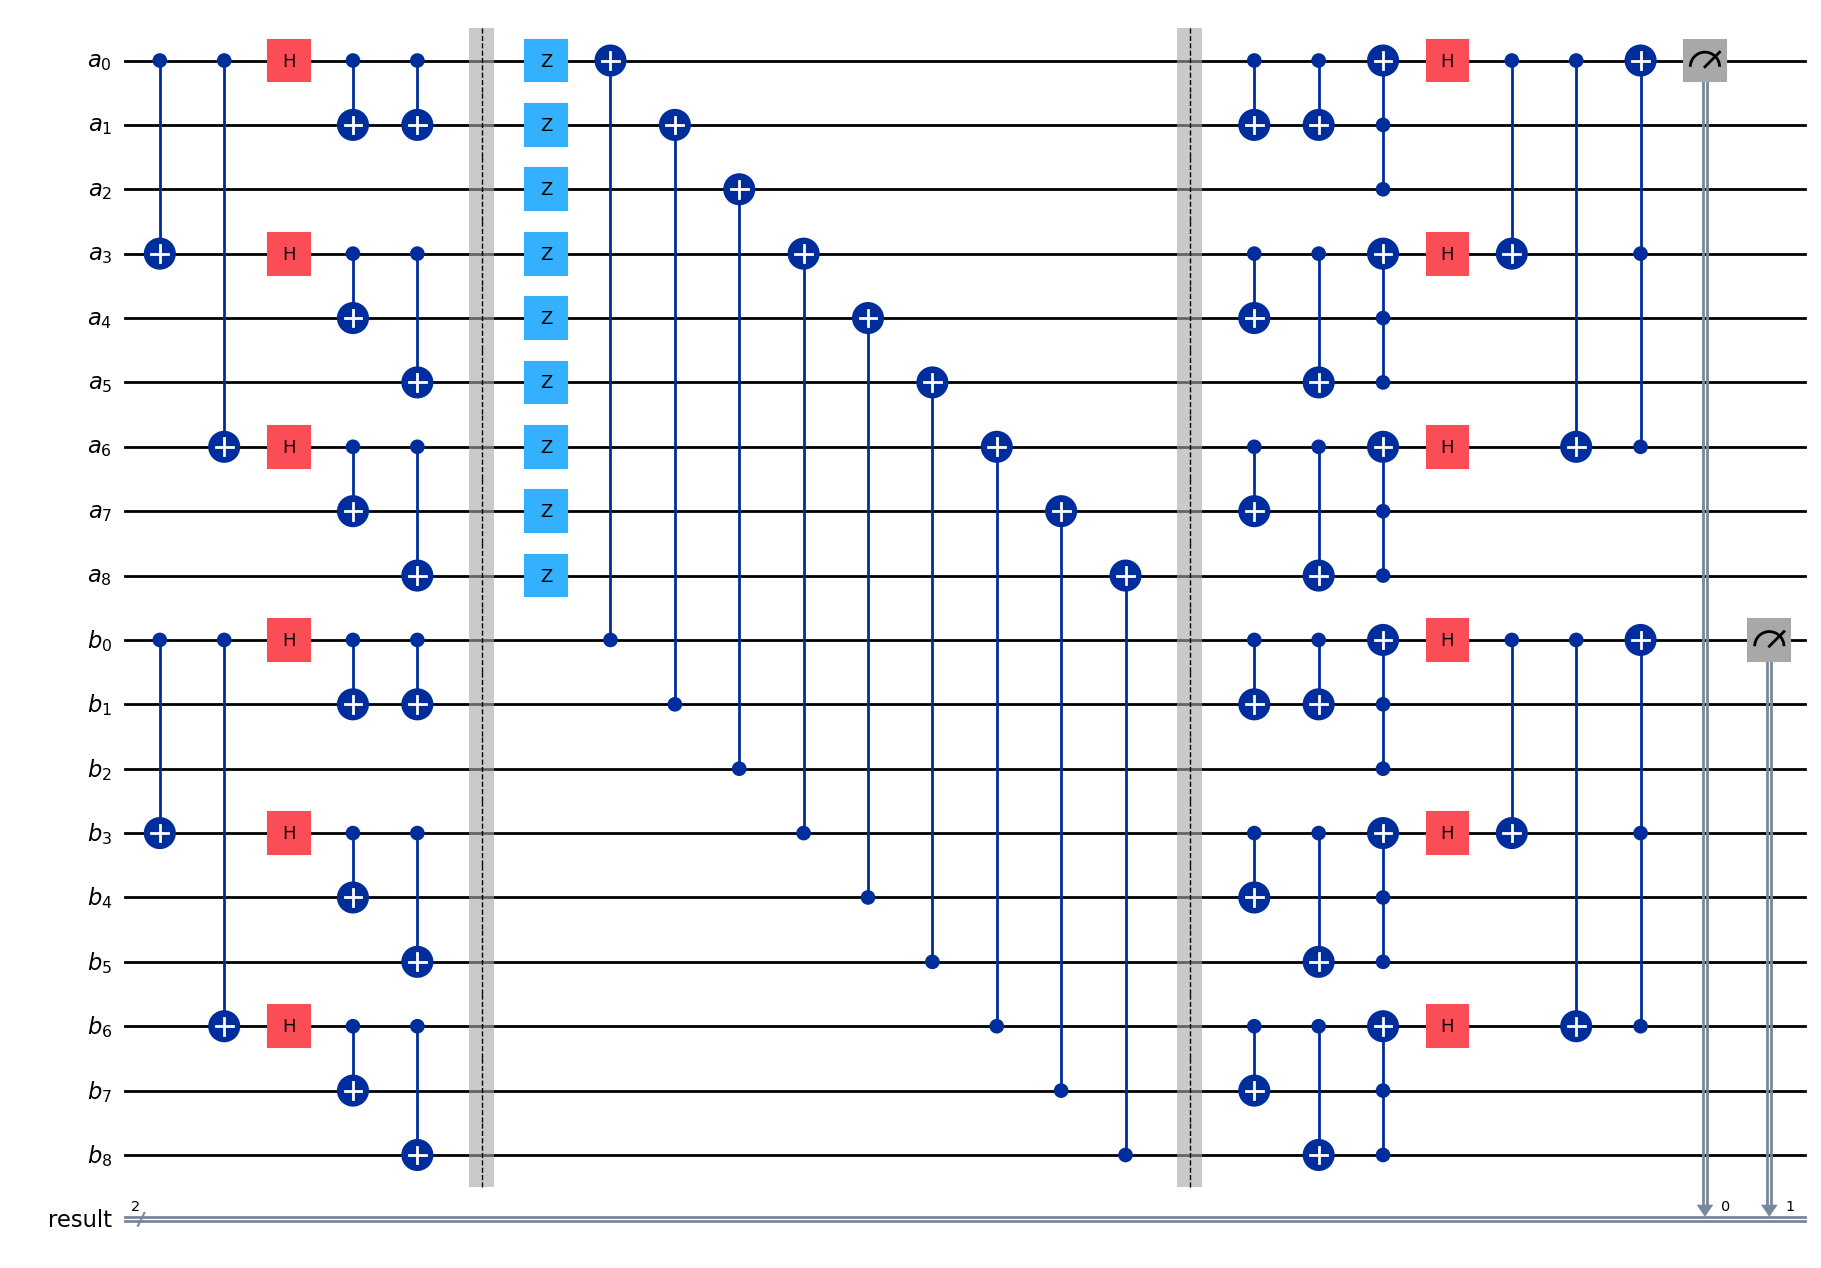

In [86]:
# Create quantum registers
areq = qiskit.QuantumRegister(9, "a")
breq = qiskit.QuantumRegister(9, "b")


creq = qiskit.ClassicalRegister(2, "result")
circuit = qiskit.QuantumCircuit(areq, breq, creq)

# Shor setup
circuit.cx(areq[0], areq[3])
circuit.cx(areq[0], areq[6])
circuit.h(areq[0])
circuit.h(areq[3])
circuit.h(areq[6])
circuit.cx(areq[0], areq[1])
circuit.cx(areq[0], areq[1])
circuit.cx(areq[3], areq[4])
circuit.cx(areq[3], areq[5])
circuit.cx(areq[6], areq[7])
circuit.cx(areq[6], areq[8])

circuit.cx(breq[0], breq[3])
circuit.cx(breq[0], breq[6])
circuit.h(breq[0])
circuit.h(breq[3])
circuit.h(breq[6])
circuit.cx(breq[0], breq[1])
circuit.cx(breq[0], breq[1])
circuit.cx(breq[3], breq[4])
circuit.cx(breq[3], breq[5])
circuit.cx(breq[6], breq[7])
circuit.cx(breq[6], breq[8])

circuit.barrier()

# It appears to make a CNOT work in Shor code needs to be flipped around
# The target becomes the control and the control becomes the target

# Normal
# for i in range(9):
#     circuit.z(areq[i])
#     circuit.cx(areq[i], breq[i])

# Flipped
for i in range(9):
    circuit.z(areq[i])
    circuit.cx(breq[i], areq[i])

circuit.barrier()

circuit.cx(areq[0], areq[1])
circuit.cx(areq[0], areq[1])
circuit.ccx(areq[2], areq[1], areq[0])
circuit.cx(areq[3], areq[4])
circuit.cx(areq[3], areq[5])
circuit.ccx(areq[5], areq[4], areq[3])
circuit.cx(areq[6], areq[7])
circuit.cx(areq[6], areq[8])
circuit.ccx(areq[8], areq[7], areq[6])
circuit.h(areq[0])
circuit.h(areq[3])
circuit.h(areq[6])
circuit.cx(areq[0], areq[3])
circuit.cx(areq[0], areq[6])
circuit.ccx(areq[6], areq[3], areq[0])

circuit.cx(breq[0], breq[1])
circuit.cx(breq[0], breq[1])
circuit.ccx(breq[2], breq[1], breq[0])
circuit.cx(breq[3], breq[4])
circuit.cx(breq[3], breq[5])
circuit.ccx(breq[5], breq[4], breq[3])
circuit.cx(breq[6], breq[7])
circuit.cx(breq[6], breq[8])
circuit.ccx(breq[8], breq[7], breq[6])
circuit.h(breq[0])
circuit.h(breq[3])
circuit.h(breq[6])
circuit.cx(breq[0], breq[3])
circuit.cx(breq[0], breq[6])
circuit.ccx(breq[6], breq[3], breq[0])

circuit.measure(areq[0], creq[0])
circuit.measure(breq[0], creq[1])


# Run the circuit

simulator = common.SimulatedQuantumComputer(circuit, 512)
counts = simulator.run()

print(f"Result: {simulator.most_common()}")
circuit.draw("mpl", fold=100)

## What does a Toffoli look like Shor Code

Result: 111


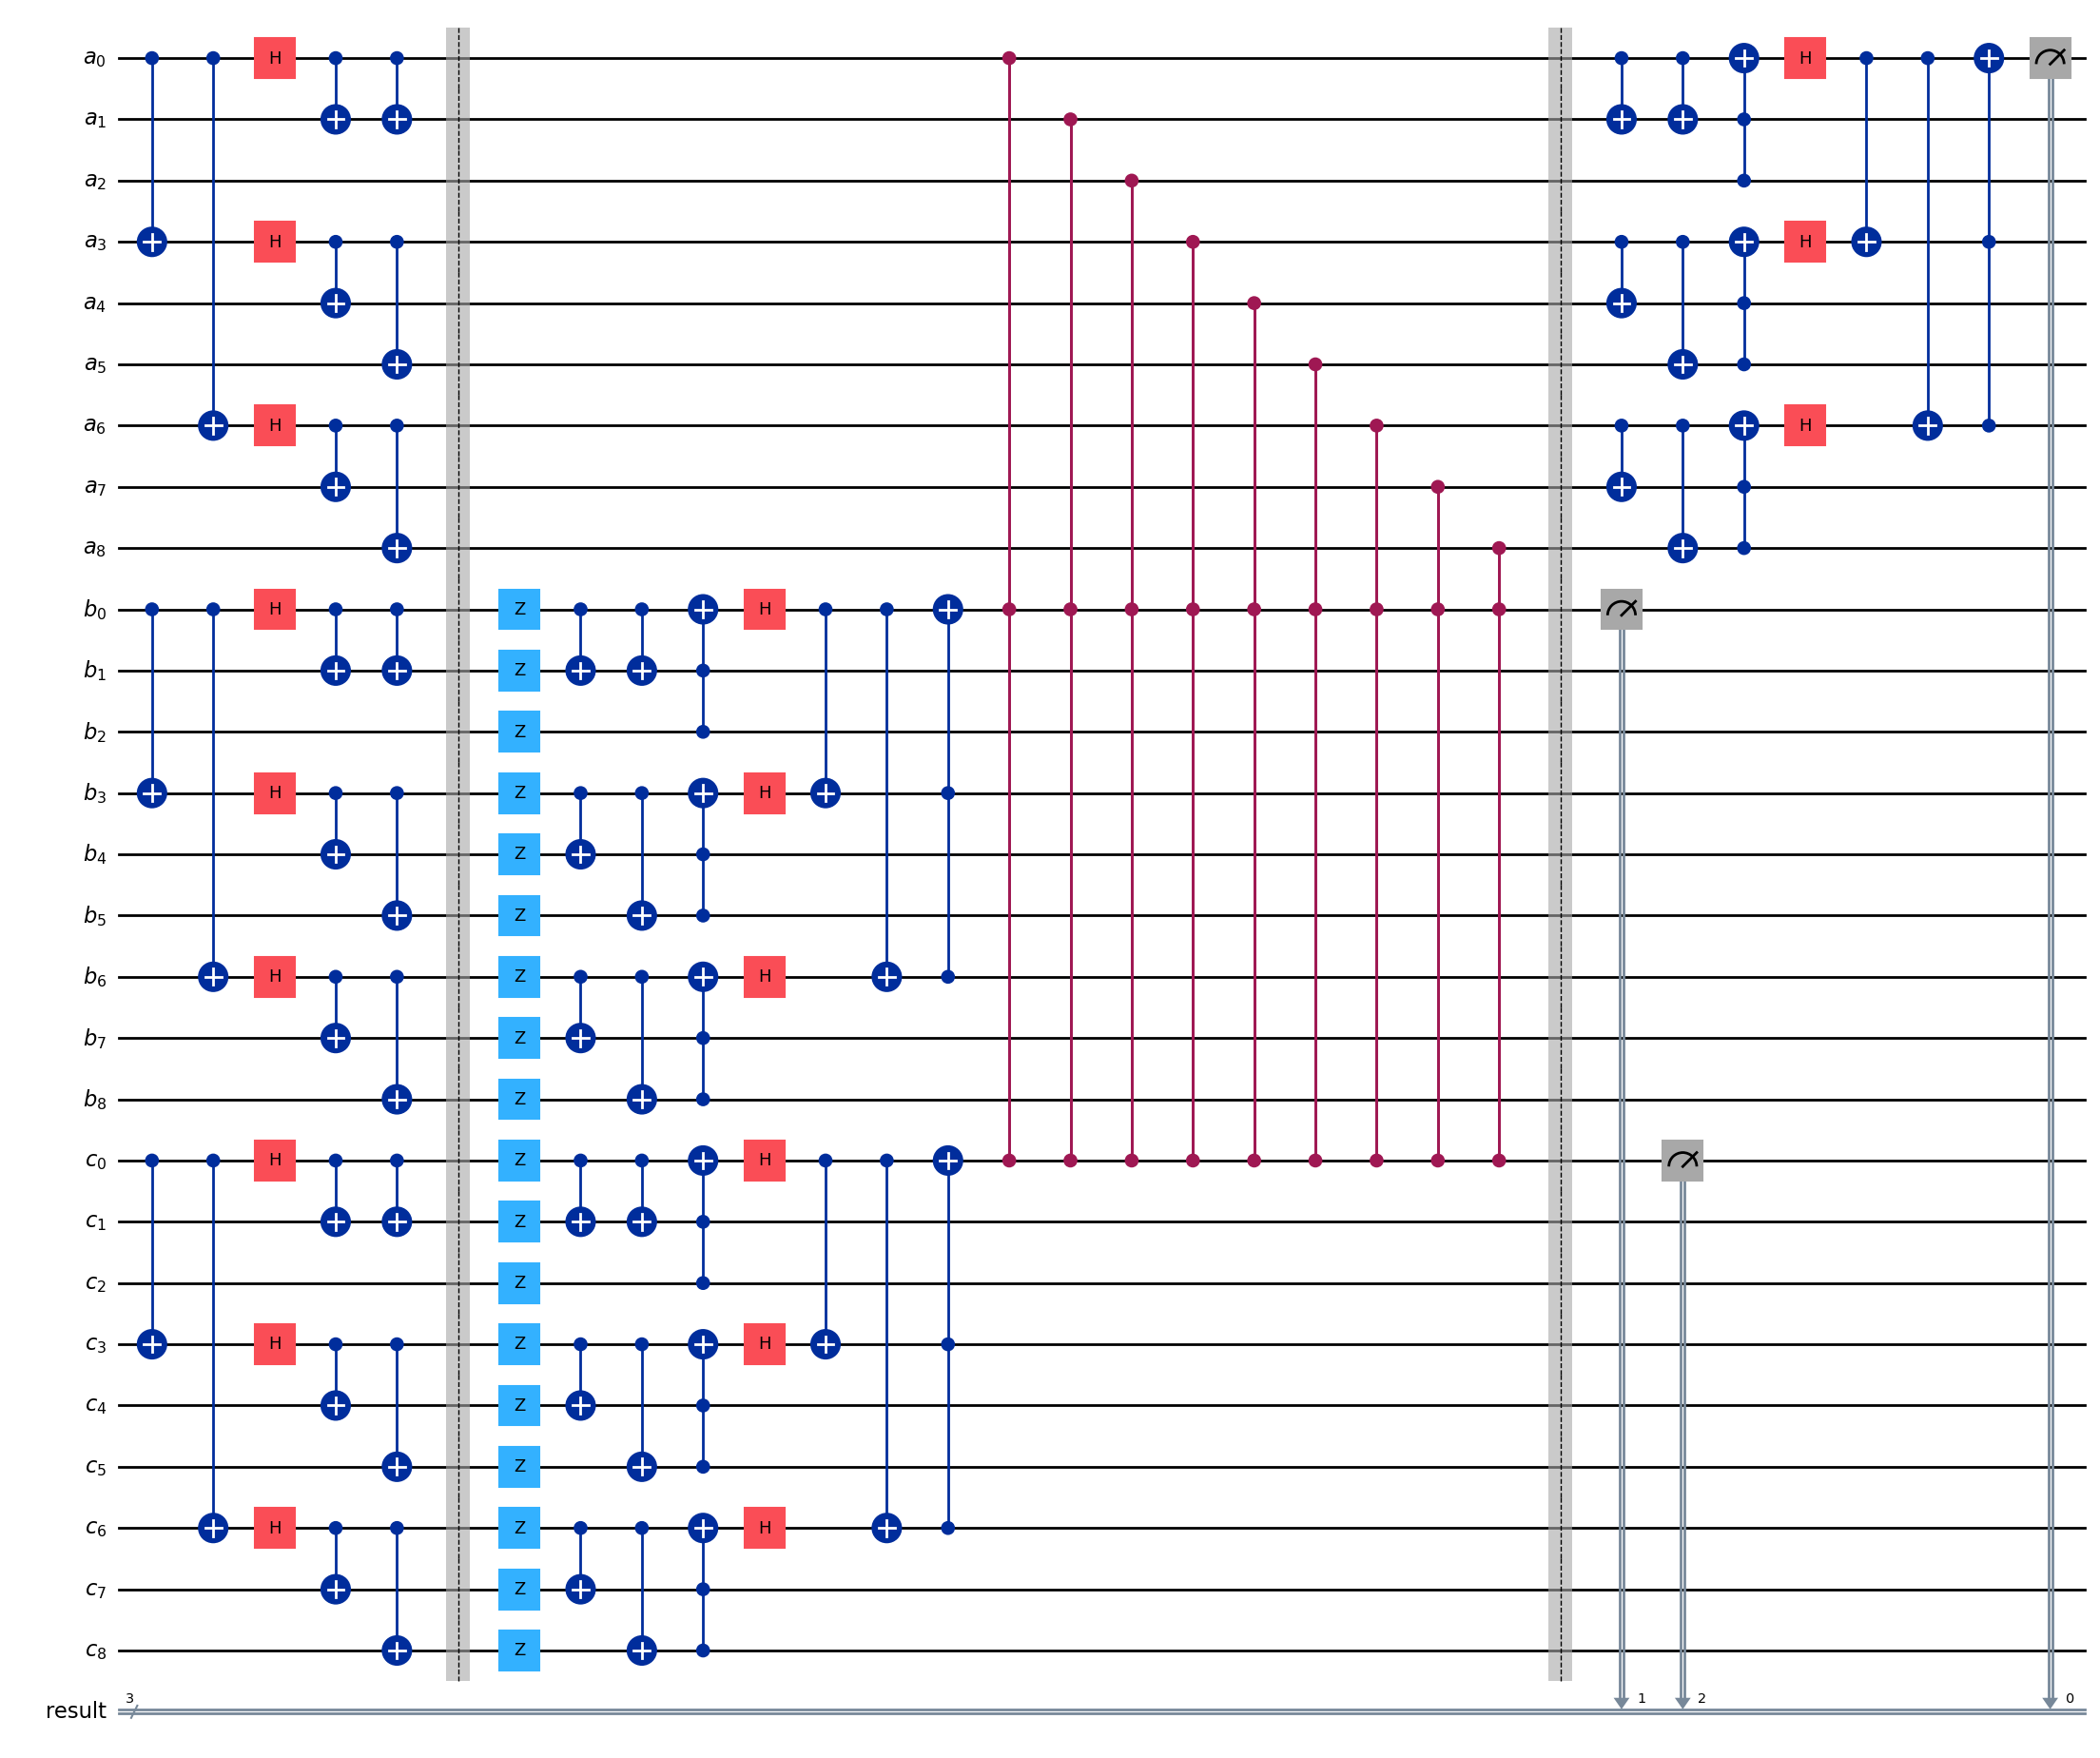

In [85]:
# Create quantum registers
areq = qiskit.QuantumRegister(9, "a")
breq = qiskit.QuantumRegister(9, "b")
creq = qiskit.QuantumRegister(9, "c")


dreq = qiskit.ClassicalRegister(3, "result")
circuit = qiskit.QuantumCircuit(areq, breq,creq,  dreq)

# Shor setup
circuit.cx(areq[0], areq[3])
circuit.cx(areq[0], areq[6])
circuit.h(areq[0])
circuit.h(areq[3])
circuit.h(areq[6])
circuit.cx(areq[0], areq[1])
circuit.cx(areq[0], areq[1])
circuit.cx(areq[3], areq[4])
circuit.cx(areq[3], areq[5])
circuit.cx(areq[6], areq[7])
circuit.cx(areq[6], areq[8])

circuit.cx(breq[0], breq[3])
circuit.cx(breq[0], breq[6])
circuit.h(breq[0])
circuit.h(breq[3])
circuit.h(breq[6])
circuit.cx(breq[0], breq[1])
circuit.cx(breq[0], breq[1])
circuit.cx(breq[3], breq[4])
circuit.cx(breq[3], breq[5])
circuit.cx(breq[6], breq[7])
circuit.cx(breq[6], breq[8])

circuit.cx(creq[0], creq[3])
circuit.cx(creq[0], creq[6])
circuit.h(creq[0])
circuit.h(creq[3])
circuit.h(creq[6])
circuit.cx(creq[0], creq[1])
circuit.cx(creq[0], creq[1])
circuit.cx(creq[3], creq[4])
circuit.cx(creq[3], creq[5])
circuit.cx(creq[6], creq[7])
circuit.cx(creq[6], creq[8])

circuit.barrier()


# To make the Toffoli gate work in Shor code the two control qubits need to be teardowned
# back to their singular physical qubit, then a CCZ gate is used
for i in range(9):
    circuit.z(breq[i])
    circuit.z(creq[i])


circuit.cx(breq[0], breq[1])
circuit.cx(breq[0], breq[1])
circuit.ccx(breq[2], breq[1], breq[0])
circuit.cx(breq[3], breq[4])
circuit.cx(breq[3], breq[5])
circuit.ccx(breq[5], breq[4], breq[3])
circuit.cx(breq[6], breq[7])
circuit.cx(breq[6], breq[8])
circuit.ccx(breq[8], breq[7], breq[6])
circuit.h(breq[0])
circuit.h(breq[3])
circuit.h(breq[6])
circuit.cx(breq[0], breq[3])
circuit.cx(breq[0], breq[6])
circuit.ccx(breq[6], breq[3], breq[0])

circuit.cx(creq[0], creq[1])
circuit.cx(creq[0], creq[1])
circuit.ccx(creq[2], creq[1], creq[0])
circuit.cx(creq[3], creq[4])
circuit.cx(creq[3], creq[5])
circuit.ccx(creq[5], creq[4], creq[3])
circuit.cx(creq[6], creq[7])
circuit.cx(creq[6], creq[8])
circuit.ccx(creq[8], creq[7], creq[6])
circuit.h(creq[0])
circuit.h(creq[3])
circuit.h(creq[6])
circuit.cx(creq[0], creq[3])
circuit.cx(creq[0], creq[6])
circuit.ccx(creq[6], creq[3], creq[0])

for i in range(9):
    circuit.ccz(creq[0], breq[0], areq[i])

circuit.barrier()

circuit.cx(areq[0], areq[1])
circuit.cx(areq[0], areq[1])
circuit.ccx(areq[2], areq[1], areq[0])
circuit.cx(areq[3], areq[4])
circuit.cx(areq[3], areq[5])
circuit.ccx(areq[5], areq[4], areq[3])
circuit.cx(areq[6], areq[7])
circuit.cx(areq[6], areq[8])
circuit.ccx(areq[8], areq[7], areq[6])
circuit.h(areq[0])
circuit.h(areq[3])
circuit.h(areq[6])
circuit.cx(areq[0], areq[3])
circuit.cx(areq[0], areq[6])
circuit.ccx(areq[6], areq[3], areq[0])



circuit.measure(areq[0], dreq[0])
circuit.measure(breq[0], dreq[1])
circuit.measure(creq[0], dreq[2])


# Run the circuit

simulator = common.SimulatedQuantumComputer(circuit, 512)
counts = simulator.run()

print(f"Result: {simulator.most_common()}")
circuit.draw("mpl", fold=100)